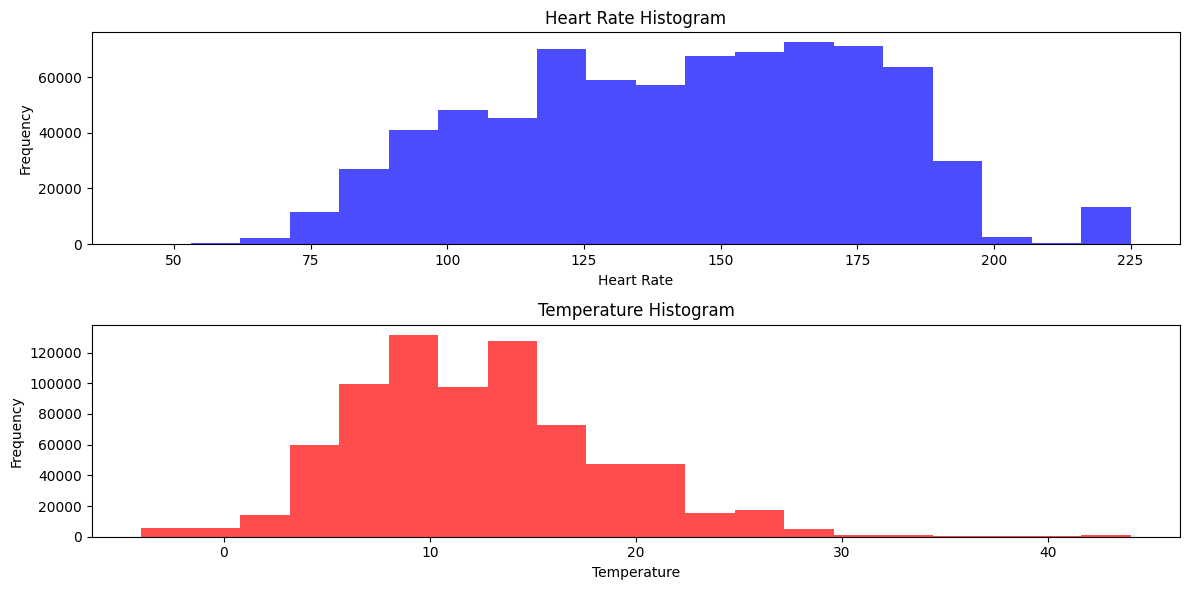

Mean Heart Rate: 143.27112484897515
Median Temperature: 12.0
Standard Deviation of Heart Rate: 33.08489042852606


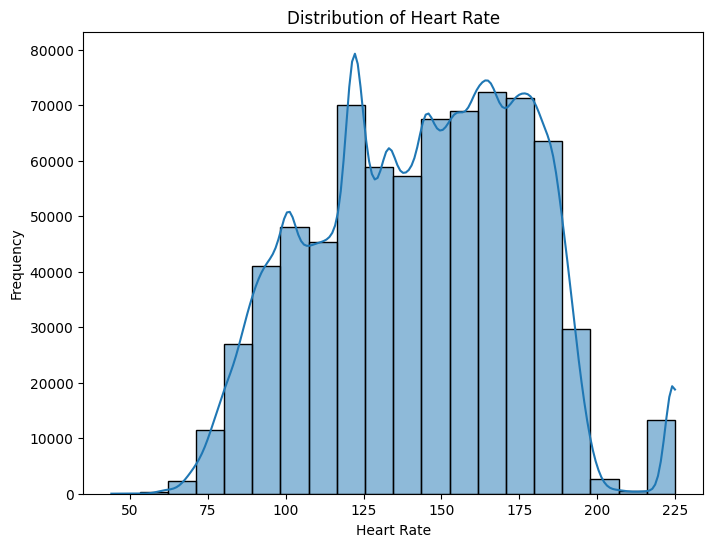

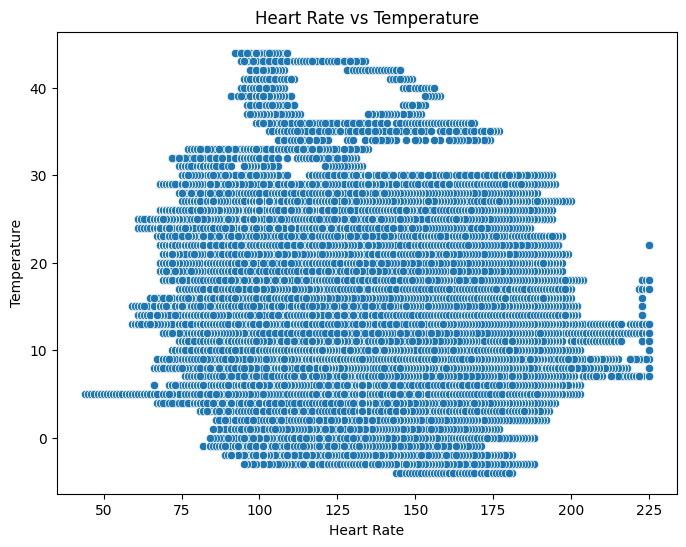

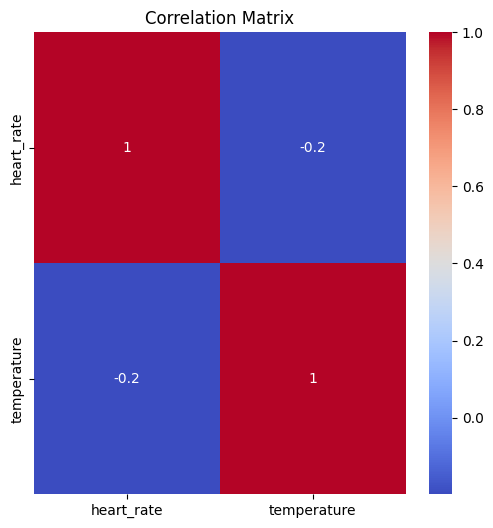

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load your data into a pandas DataFrame
data = pd.read_csv("ExerciseData_combined_csv_user4.csv", low_memory=False)

# Data Preprocessing

# Convert 'heart_rate' and 'temperature' to numeric
data['heart_rate'] = pd.to_numeric(data['heart_rate'], errors='coerce')
data['temperature'] = pd.to_numeric(data['temperature'], errors='coerce')

# Handle missing data
data['heart_rate'].fillna(method='ffill', inplace=True)
data['temperature'].fillna(method='bfill', inplace=True)

# Plotting Histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.hist(data['heart_rate'], bins=20, color='blue', alpha=0.7)
plt.title('Heart Rate Histogram')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(data['temperature'], bins=20, color='red', alpha=0.7)
plt.title('Temperature Histogram')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Compute Statistics
mean_heart_rate = data['heart_rate'].mean()
median_temperature = data['temperature'].median()
std_dev_heart_rate = data['heart_rate'].std()

print(f"Mean Heart Rate: {mean_heart_rate}")
print(f"Median Temperature: {median_temperature}")
print(f"Standard Deviation of Heart Rate: {std_dev_heart_rate}")

# Distribution and Scatter Plot
plt.figure(figsize=(8, 6))
sns.histplot(data['heart_rate'], bins=20, kde=True)
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Heart Rate')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='heart_rate', y='temperature', data=data)
plt.xlabel('Heart Rate')
plt.ylabel('Temperature')
plt.title('Heart Rate vs Temperature')
plt.show()

# Correlation Heatmap
correlation_matrix = data[['heart_rate', 'temperature']].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



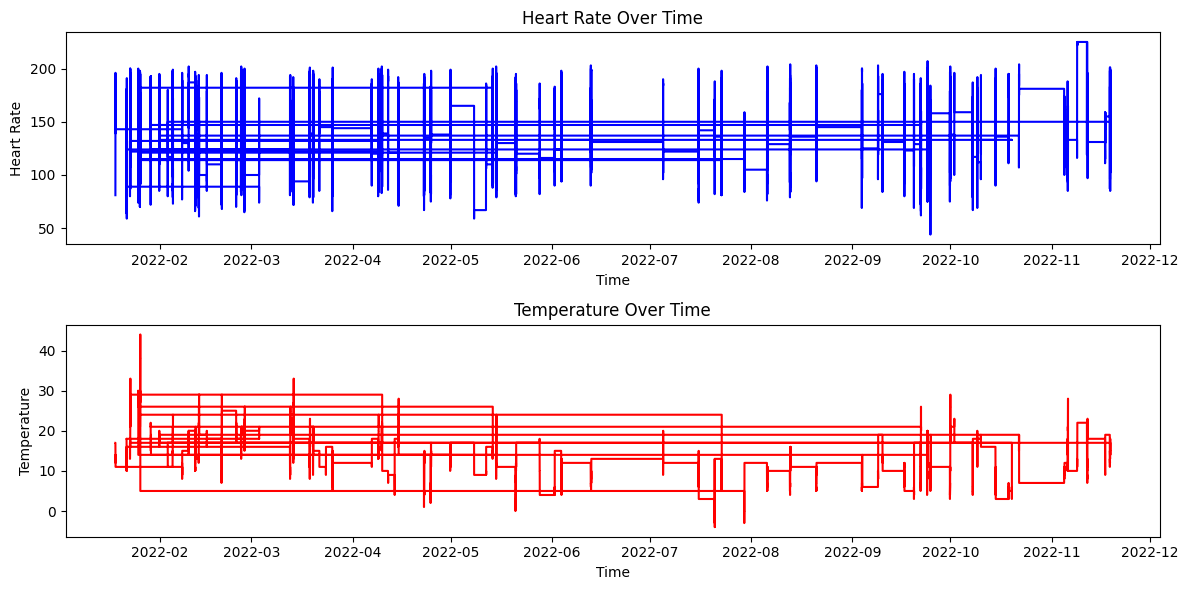

In [20]:
# Convert 'timestamp' to datetime with timezone
data['timestamp'] = pd.to_datetime(data['timestamp'], utc=True)

# Set 'timestamp' as the index
data.set_index('timestamp', inplace=True)

# Convert 'heart_rate' and 'temperature' to numeric
data['heart_rate'] = pd.to_numeric(data['heart_rate'], errors='coerce')
data['temperature'] = pd.to_numeric(data['temperature'], errors='coerce')

# Plotting heart rate and temperature
plt.figure(figsize=(12, 6))

# Heart Rate
plt.subplot(2, 1, 1)  # Create a subplot for heart rate
plt.plot(data['heart_rate'], color='blue')
plt.title('Heart Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate')

# Temperature
plt.subplot(2, 1, 2)  # Create a subplot for temperature
plt.plot(data['temperature'], color='red')
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.tight_layout()  # Adjust layout to prevent overlap of plots
plt.show()


<ipython-input-21-7413b590b6d7>:8: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('ExerciseData_combined_csv_user4.csv')
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


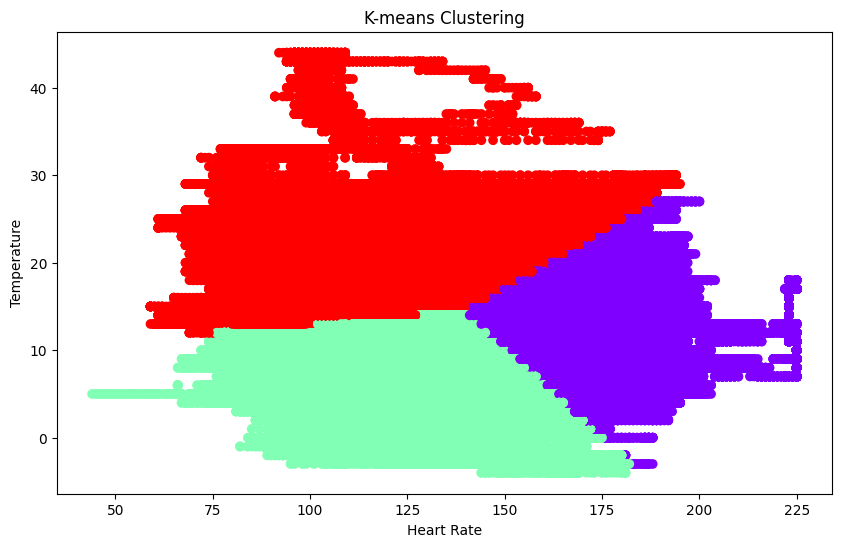

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('ExerciseData_combined_csv_user4.csv')

# Replace 'None' values with NaN
data.replace('None', float('nan'), inplace=True)

# Convert 'temperature' and 'heart_rate' columns to numeric
data['temperature'] = pd.to_numeric(data['temperature'], errors='coerce')
data['heart_rate'] = pd.to_numeric(data['heart_rate'], errors='coerce')

# Drop rows with missing values
data.dropna(subset=['temperature', 'heart_rate'], inplace=True)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['temperature', 'heart_rate']])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Perform K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(principal_components)

# Add cluster labels to the dataset
data['cluster'] = cluster_labels

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['heart_rate'], data['temperature'], c=data['cluster'], cmap='rainbow')
plt.xlabel('Heart Rate')
plt.ylabel('Temperature')
plt.title('K-means Clustering')
plt.show()
